nodes visited   26500000
cache space     30000034
nodes stored    12861954
nodes forgotten 2186093
current depth   10
current node    61 15 56 62 06 22 77 44 33 10
role: max
  root: work:  17187691 pn0:   3827 pn1:   3827 dn0:   8562 dn1:   8562 

role: min
(6, 1): work:   2543755 pn0:   3827 pn1:   3827 dn0:   1319 dn1:   1319 
(7, 0): work:   2908834 pn0:   3904 pn1:   3904 dn0:   1439 dn1:   1439 
(6, 0): work:   3378074 pn0:   3851 pn1:   3851 dn0:   1696 dn1:   1696 
(7, 2): work:   4301672 pn0:   3851 pn1:   3851 dn0:   2150 dn1:   2150 
(7, 1): work:   4055355 pn0:   3886 pn1:   3886 dn0:   1958 dn1:   1958 

expanding move (6, 1)
role: max
(2, 5): work:    410960 pn0:    604 pn1:    604 dn0:   1358 dn1:   1358 
(1, 3): work:    388797 pn0:    591 pn1:    591 dn0:   1334 dn1:   1334 
(1, 4): work:    389118 pn0:    563 pn1:    563 dn0:   1331 dn1:   1331 
(1, 5): work:    388648 pn0:    575 pn1:    575 dn0:   1331 dn1:   1331 
(0, 4): work:    327383 pn0:    496 pn1:    496 dn0:

KeyboardInterrupt: 

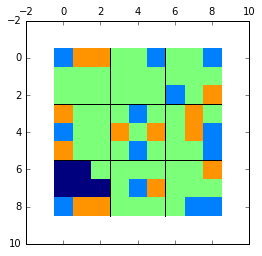

In [2]:
import sys
sys.path.append('../')

import tictactics_cython as tact
from tictactics_cython import Board
import dfpn_multi as dfpn
import matplotlib
import numpy as np
import cProfile
from matplotlib import pyplot as plt
import time
%matplotlib inline

board = np.zeros((9,9))
for x in [(0,1),(0,2),(3,0),(5,0),(4,3),(4,5),(4,7),(8,1),(8,2)]:
    board[x]=1
for o in [(0,0),(4,0),(8,0),(3,4),(5,4),(0,8),(4,8),(8,8),(7,4)]:
    board[o]=-1
big_board = np.array([[0,0,0],
                      [0,0,0],
                      [0,0,0]])

player = 1
game = Board(board=board,big_board = big_board,player = player)
for move in [(3,7),(0,5),(2,8),(8,7),(7,5),(5,8),(6,8),(2,6)]:
    game.update_move(move)
log_len = len(game.log)
dfpn.init()




tact.fancy_board(game)
t0 = time.clock()
# cProfile.run('node,tree = dfpn.solve(game,root = True,epsilon=1.1)',sort = 'tottime')
node,tree = dfpn.solve(game,3,{1:0,0:1,-1:2,2:1,-2:1},1,root = True,epsilon=1.02)
print 'time',time.clock() - t0
print tree

In [ ]:
with open('book8done.txt','w') as file_:
    file_.write('finished')
    